<a href="https://colab.research.google.com/github/fluxtransport/glmtools/blob/master/examples/glm_from_gc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load GLM data files from Google Cloud

---



---

In [0]:
try:
  import glmtools
except:
  !pip install git+https://github.com/fluxtransport/glmtools.git
  import glmtools
try:
  import siphon
except:
  !pip install siphon
try: 
  import netCDF4 as netcdf
except:
  !pip install netCDF4
  import netCDF4 as netcdf

In [0]:
import xarray as xr
import pandas as pd
import numpy as np
import os
from glmtools.io.imagery import open_glm_time_series, aggregate

tornado.application - ERROR - Multiple exceptions in yield list
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 828, in callback
    result_list.append(f.result())
  File "/usr/local/lib/python3.6/dist-packages/tornado/concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 1069, in run
    yielded = self.gen.send(value)
  File "/usr/local/lib/python3.6/dist-packages/distributed/deploy/local.py", line 229, in _start_worker
    raise gen.TimeoutError("Worker failed to start")
tornado.gen.TimeoutError: Worker failed to start

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 828, in callback
    result_list.append(f.result())
  File "/usr/local/lib/python3.6/dist-packages/tornado/concu

KeyboardInterrupt: ignored

In [0]:
!gsutil -m cp  gs://gcp-public-data-goes-16/GLM-L2-LCFA/2018/044/16/* /tmp

Copying gs://gcp-public-data-goes-16/GLM-L2-LCFA/2018/044/16/OR_GLM-L2-LCFA_G16_s20180441610000_e20180441610200_c20180441610224.nc...
Copying gs://gcp-public-data-goes-16/GLM-L2-LCFA/2018/044/16/OR_GLM-L2-LCFA_G16_s20180441610200_e20180441610400_c20180441610419.nc...
Copying gs://gcp-public-data-goes-16/GLM-L2-LCFA/2018/044/16/OR_GLM-L2-LCFA_G16_s20180441613000_e20180441613200_c20180441613215.nc...
Copying gs://gcp-public-data-goes-16/GLM-L2-LCFA/2018/044/16/OR_GLM-L2-LCFA_G16_s20180441612000_e20180441612200_c20180441612223.nc...
Copying gs://gcp-public-data-goes-16/GLM-L2-LCFA/2018/044/16/OR_GLM-L2-LCFA_G16_s20180441610400_e20180441611000_c20180441611026.nc...
Copying gs://gcp-public-data-goes-16/GLM-L2-LCFA/2018/044/16/OR_GLM-L2-LCFA_G16_s20180441612400_e20180441613000_c20180441613028.nc...
Copying gs://gcp-public-data-goes-16/GLM-L2-LCFA/2018/044/16/OR_GLM-L2-LCFA_G16_s20180441611200_e20180441611400_c20180441611427.nc...
Copying gs://gcp-public-data-goes-16/GLM-L2-LCFA/2018/044/16/O

In [0]:
import glob
import numpy as np
from glmtools.io.glm import GLMDataset

fns = np.sort(glob.glob('/tmp/OR_GLM-L2*.nc'))
print(fns[0])

accum_mins = 3
glm = GLMDataset(fns[0])
#glm = open_glm_time_series(fns[0])
print(glm)

# accumulate over 3 minutes. To also subset a long dataset, see the start_end kwarg
#agglm = aggregate(glm, accum_mins)
# Set the time coordinate to the start time of each time bin (could also choose mid)
#agglm['time_bins'] = [v.left for v in agglm.time_bins.values]
#glm_grids = agglm.rename({'time_bins':'time'})
#print(glm_grids)

/tmp/OR_GLM-L2-LCFA_G16_s20180441610000_e20180441610200_c20180441610224.nc


In [0]:
glm.dataset

<xarray.Dataset>
Dimensions:                                 (number_of_events: 2085, number_of_field_of_view_bounds: 2, number_of_flashes: 102, number_of_groups: 1177, number_of_time_bounds: 2, number_of_wavelength_bounds: 2)
Coordinates:
    event_id                                (number_of_events) uint32 143872331 ... 143874537
    event_time_offset                       (number_of_events) datetime64[ns] ...
    event_lat                               (number_of_events) float32 -22.562473 ... -17.293335
    event_lon                               (number_of_events) float32 -46.404686 ... -54.015892
    event_parent_group_id                   (number_of_events) uint32 60159680 ... 60160923
    group_id                                (number_of_groups) uint32 60159680 ... 60160923
    group_time_offset                       (number_of_groups) datetime64[ns] ...
    group_lat                               (number_of_groups) float32 -22.564932 ... -17.217188
    group_lon                               (number_of_groups) float32 -46.34405 ... -54.065018
    group_parent_flash_id                   (number_of_groups) uint16 21630 ... 21786
    flash_id                                (number_of_flashes) uint16 21630 ... 21786
    flash_time_offset_of_first_event        (number_of_flashes) datetime64[ns] ...
    flash_time_offset_of_last_event         (number_of_flashes) datetime64[ns] ...
    flash_lat                               (number_of_flashes) float32 -22.569193 ... -17.219889
    flash_lon                               (number_of_flashes) float32 -46.3687 ... -54.06454
    product_time                            datetime64[ns] 2018-02-13T16:10:00
    lightning_wavelength                    float32 ...
    group_time_threshold                    float32 ...
    flash_time_threshold                    float32 ...
    lat_field_of_view                       float32 ...
    lon_field_of_view                       float32 -75.0
Dimensions without coordinates: number_of_events, number_of_field_of_view_bounds, number_of_flashes, number_of_groups, number_of_time_bounds, number_of_wavelength_bounds
Data variables:
    event_energy                            (number_of_events) float32 3.05194e-06 ... 4.5779097e-06
    group_area                              (number_of_groups) float32 ...
    group_energy                            (number_of_groups) float32 7.62985e-06 ... 7.477253e-05
    group_quality_flag                      (number_of_groups) float32 ...
    flash_area                              (number_of_flashes) float32 ...
    flash_energy                            (number_of_flashes) float32 0.000117499694 ... 9.9188044e-05
    flash_quality_flag                      (number_of_flashes) float32 ...
    product_time_bounds                     (number_of_time_bounds) datetime64[ns] 2018-02-13T16:10:00 2018-02-13T16:10:20
    lightning_wavelength_bounds             (number_of_wavelength_bounds) float32 ...
    lat_field_of_view_bounds                (number_of_field_of_view_bounds) float32 ...
    goes_lat_lon_projection                 int32 ...
    event_count                             float64 ...
    group_count                             float64 ...
    flash_count                             float64 ...
    percent_navigated_L1b_events            float32 ...
    yaw_flip_flag                           float32 ...
    nominal_satellite_subpoint_lat          float32 ...
    nominal_satellite_height                float32 ...
    nominal_satellite_subpoint_lon          float32 ...
    lon_field_of_view_bounds                (number_of_field_of_view_bounds) float32 ...
    percent_uncorrectable_L0_errors         float32 ...
    algorithm_dynamic_input_data_container  int32 ...
    processing_parm_version_container       int32 ...
    algorithm_product_version_container     int32 ...
    event_parent_flash_id                   (number_of_events) uint16 21630 ... 21786
    flash_child_group_count                 (number

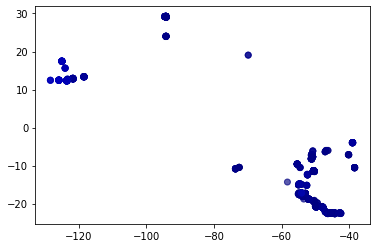

In [0]:
import matplotlib.pyplot as plt
#plt.plot(glm.dataset['event_energy'].data)
min, max = glm.dataset['event_energy'].data.min(), glm.dataset['event_energy'].data.max()
color = [((item-min)/(np.median(glm.dataset['event_energy'].data)-min)) for item in glm.dataset['event_energy'].data]

plt.scatter(glm.dataset['event_lon'].data, glm.dataset['event_lat'].data, 
            c=color, cmap='jet',alpha=0.4)



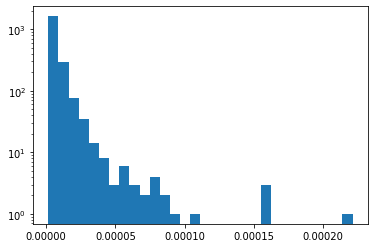

In [0]:
plt.hist(glm.dataset['event_energy'].data, bins=30)
plt.yscale('log')

In [0]:
# %matplotlib notebook
# import matplotlib.pyplot as plt
# from glmtools.plot.grid import plot_glm_grid
# fig= plt.figure(figsize=(12,8))
# first_time = agglm[{'time_bins':0}]

%matplotlib notebook
import matplotlib.pyplot as plt
from glmtools.plot.grid import plot_glm_grid

fields_6panel = ['flash_extent_density', 'minimum_flash_area','total_energy', 
                 'group_extent_density', 'average_group_area', 'group_centroid_density']


def plot(w, fig=None, time_widget=None, field_widget=None, subplots=(2,3), fields=None):
    t = pd.to_datetime(time_widget.value)
    n_subplots = subplots[0] * subplots[1]
    if fields is None:
        if n_subplots == 1:
            fields = [field_widget.value]
        else:
            fields = fields_6panel[0:n_subplots]

    mapax, cbar_obj = plot_glm_grid(fig, glm_grids, t, fields, subplots=subplots,
                                   axes_facecolor = (1.0, 1.0, 1.0), map_color = (0.2, 0.2, 0.2))


fig = plt.figure(figsize=(18,12))
plt.show()

ModuleNotFoundError: ignored

In [0]:
from ipywidgets import widgets

time_options = [str(t0) for t0 in glm_grids.time.to_series()]
time_options.sort()
field_options = list(k for k in glm_grids.variables.keys() if 'nominal' not in k)
print(field_options)
for v in ['x', 'y', 'time', 'goes_imager_projection']: field_options.remove(v)
field_dropdown = widgets.Dropdown(options=field_options)
time_slider = widgets.SelectionSlider(options=time_options)
glm_select = widgets.HBox([field_dropdown, time_slider])

from functools import partial
plot = partial(plot, fig=fig, field_widget=field_dropdown, time_widget=time_slider)
time_slider.observe(plot)
field_dropdown.observe(plot)

display(glm_select)
plot('yo') # trigger plot since slider won't adjust with only one time.
time_slider.value = time_slider.options[0]

NameError: ignored

### Find the time since the last flash

In [0]:

fed_bool = (glm.flash_extent_density > 0.5) # ntimes,ny,nx array
no_fed = (fed_bool.sum(dim='time') < 1)

last_time_idx = fed_bool.argmax(dim='time').compute() # Remove compute if not using dask.
print(last_time_idx.min(), last_time_idx.max())
# glm['time_of_last_flash'] = xr.zeros_like(last_time_idx, dtype=glm.time.dtype)

NameError: ignored

In [0]:

# never = xr.DataArray(np.datetime64('1980-11-01T00:00:00'))


# last_time_array = np.zeros_like(last_time_idx, dtype=glm.time.data.dtype)
last_times = glm.time[last_time_idx]
never = xr.ones_like(last_times)
never[:] = np.datetime64('1980-11-01T00:00:00')
now = xr.ones_like(last_times)
now[:] = glm.time[-1].data #np.datetime64('now')

final_times = np.where(no_fed, never, last_times)

last_times[:] = final_times

print(type(never), never.dtype, never.shape)
print(type(last_times), last_times.dtype, last_times.shape)
print(type(no_fed), no_fed.dtype, no_fed.shape)

time_since = now - final_times

# flattened = last_times.data.flatten()
# flattened[no_fed.flatten()] = never
# last_times.shape = no_fed.shape
# glm['time_of_last_flash'][no_fed.data.flatten()] = never

# glm['time_of_last_flash'] = 

NameError: ignored

In [0]:
plt.figure(figsize=(10,10))
minutes_since = time_since.data.astype('timedelta64[m]')
print(minutes_since.min(), minutes_since.max())

# This is minutes since last flash; areas labled "5" are really much larger … dating back to "never"
plt.imshow(minutes_since.astype(int), vmin=0, vmax=5)
plt.colorbar()

<IPython.core.display.Javascript object>

NameError: ignored